In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as graph
from keras.datasets import mnist
from keras import models
from keras import layers
from keras.utils import to_categorical

from rosey.graphing import plot_barplot
from sklearn.metrics import confusion_matrix

graph.style.use('fivethirtyeight')

/home/harshil/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Preprocess data

In [2]:
# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

for dataset in [train_images, train_labels, test_images, test_labels]:
    print(dataset.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


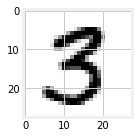

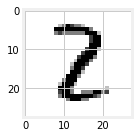

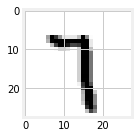

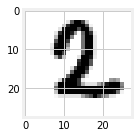

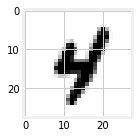

In [3]:
# Example images
for _ in range(5):
    graph.figure(figsize=(2, 2))
    idx = np.random.randint(train_images.shape[0])
    graph.imshow(train_images[idx, :, :], cmap='binary')
    graph.show()

In [4]:
# Preprocess features and labels 

def preprocess_data(data):
    assert len(data.shape) == 3
    
    print('current shape: {}'.format(data.shape))
    data = data.reshape(data.shape[0], data.shape[1] * data.shape[2])
    print('reshaped: {}'.format(data.shape))
    
    return data.astype('float32') / 255

x_train = preprocess_data(train_images)
x_test = preprocess_data(test_images)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

current shape: (60000, 28, 28)
reshaped: (60000, 784)
current shape: (10000, 28, 28)
reshaped: (10000, 784)


# Deep FeedForward Neural Network

In [5]:
# Define network 
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(x_train.shape[1],)))
network.add(layers.Dense(10, activation='softmax'))

# Compile
network.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
network.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 4s 73us/step - loss: 0.2566 - acc: 0.9252
Epoch 2/5
60000/60000 [==============================] - 5s 83us/step - loss: 0.1061 - acc: 0.9683
Epoch 3/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0706 - acc: 0.9786
Epoch 4/5
60000/60000 [==============================] - 5s 86us/step - loss: 0.0505 - acc: 0.9848
Epoch 5/5
60000/60000 [==============================] - 5s 87us/step - loss: 0.0380 - acc: 0.9888


In [6]:
# Test accuracy
test_loss, test_acc = network.evaluate(x_test, y_test)
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 1s 65us/step
test_acc: 0.9812


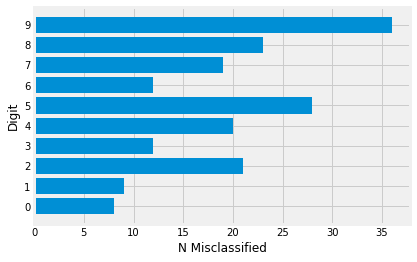

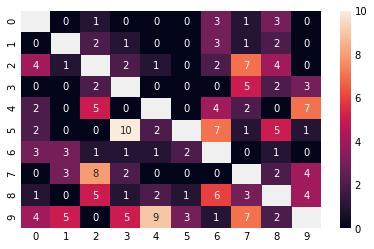

In [7]:
# Check Predictions
y_pred = network.predict(x_test).argmax(axis=1)

conf_mat = confusion_matrix(test_labels, y_pred).astype(float)
np.fill_diagonal(conf_mat, 0)

# Plot number of misclassifications
n_errors = {idx: val for idx, val in enumerate(conf_mat.sum(axis=1))}
plot_barplot(n_errors)
graph.ylabel('Digit')
graph.xlabel('N Misclassified')
graph.show()

# Plot confusion matrix
np.fill_diagonal(conf_mat, np.nan)
sns.heatmap(conf_mat, annot=True)
graph.show()

Predicted: 7


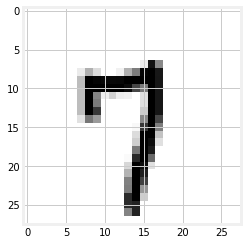

Predicted: 7


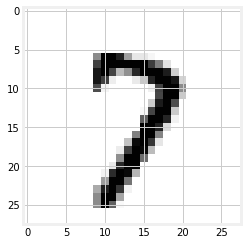

Predicted: 7


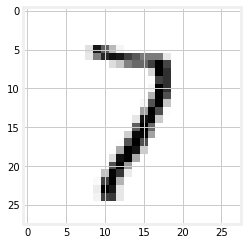

Predicted: 3


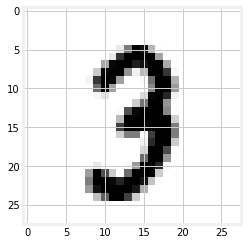

Predicted: 3


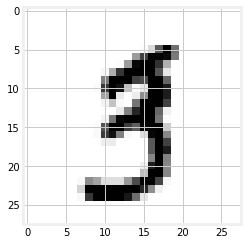

In [8]:
# More Predictions
for _ in range(5):
    idx = np.random.randint(0, high=x_test.shape[0])
    
    print(f'Predicted: {y_pred[idx]}')
    graph.imshow(test_images[idx], cmap='binary')
    graph.show()

# Convolutional Neural Network

In [9]:
def preprocess_data(data):
    assert len(data.shape) == 3
    
    print('current shape: {}'.format(data.shape))
    data = data.reshape(data.shape[0], data.shape[1], data.shape[2], 1)
    print('reshaped: {}'.format(data.shape))
    
    return data.astype('float32') / 255

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

x_train = preprocess_data(train_images)
x_test = preprocess_data(test_images)

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

current shape: (60000, 28, 28)
reshaped: (60000, 28, 28, 1)
current shape: (10000, 28, 28)
reshaped: (10000, 28, 28, 1)


In [10]:
conv = models.Sequential()
conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
conv.add(layers.MaxPooling2D((2, 2)))
conv.add(layers.Conv2D(64, (3, 3), activation='relu'))

conv.add(layers.Flatten())
conv.add(layers.Dense(64, activation='relu'))
conv.add(layers.Dense(10, activation='softmax'))

conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                36928     
__________

In [11]:
conv.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

conv.fit(x_train, y_train, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 53s 881us/step - loss: 0.1759 - acc: 0.9449
Epoch 2/5
60000/60000 [==============================] - 56s 930us/step - loss: 0.0483 - acc: 0.9853
Epoch 3/5
60000/60000 [==============================] - 61s 1ms/step - loss: 0.0338 - acc: 0.9899
Epoch 4/5
60000/60000 [==============================] - 63s 1ms/step - loss: 0.0256 - acc: 0.9921
Epoch 5/5
60000/60000 [==============================] - 62s 1ms/step - loss: 0.0196 - acc: 0.9936


In [12]:
test_loss, test_acc = conv.evaluate(x_test, y_test)
print('test_acc: {}'.format(test_acc))

10000/10000 [==============================] - 3s 348us/step
test_acc: 0.9906


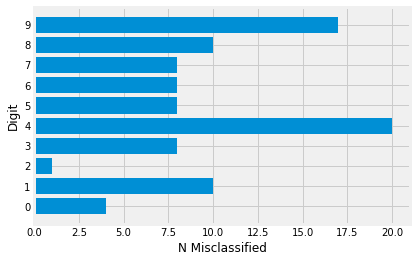

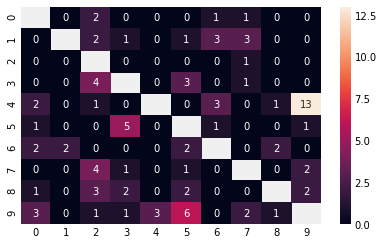

In [16]:
# Check Predictions
y_pred = conv.predict(x_test).argmax(axis=1)

conf_mat = confusion_matrix(test_labels, y_pred).astype(float)
np.fill_diagonal(conf_mat, 0)

# Plot number of misclassifications
n_errors = {idx: val for idx, val in enumerate(conf_mat.sum(axis=1))}
plot_barplot(n_errors)
graph.ylabel('Digit')
graph.xlabel('N Misclassified')
graph.show()

# Plot confusion matrix
np.fill_diagonal(conf_mat, np.nan)
sns.heatmap(conf_mat, annot=True)
graph.show()

Predicted: 2


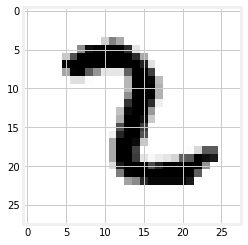

Predicted: 5


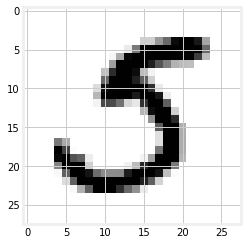

Predicted: 3


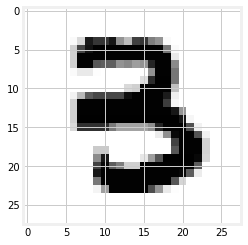

Predicted: 9


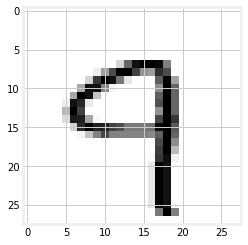

Predicted: 2


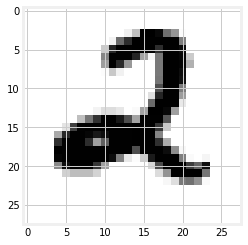

In [17]:
# More Predictions
for _ in range(5):
    idx = np.random.randint(0, high=x_test.shape[0])
    
    print(f'Predicted: {y_pred[idx]}')
    graph.imshow(test_images[idx], cmap='binary')
    graph.show()

Convolutional Neural Network has better test set accuracy in this case but takes a lot longer.

We can also see where the model screws up from the confusion matrix. 

4s are mostly misclassified as 9s
5s are mostly misclassified as 3s